In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline

In [332]:
df = pd.read_csv("case_study_data.csv")
df.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
svaing_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

In [334]:
df.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [335]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1000
Columns  :  21

Features : 
 ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status', 'other_debtors', 'residing_since', 'property', 'age', 'inst_plans', 'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'status']

Missing values :   0

Unique values :  
 checkin_acc            4
duration              33
credit_history         5
purpose               10
amount               921
svaing_acc             5
present_emp_since      5
inst_rate              4
personal_status        4
other_debtors          3
residing_since         4
property               4
age                   53
inst_plans             3
housing                3
num_credits            4
job                    4
dependents             2
telephone              2
foreign_worker         2
status                 2
dtype: int64


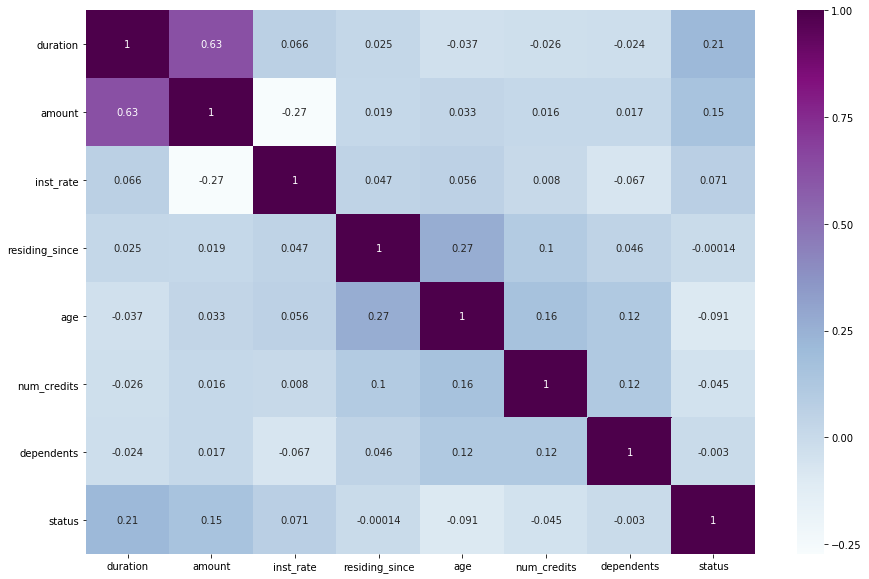

In [336]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

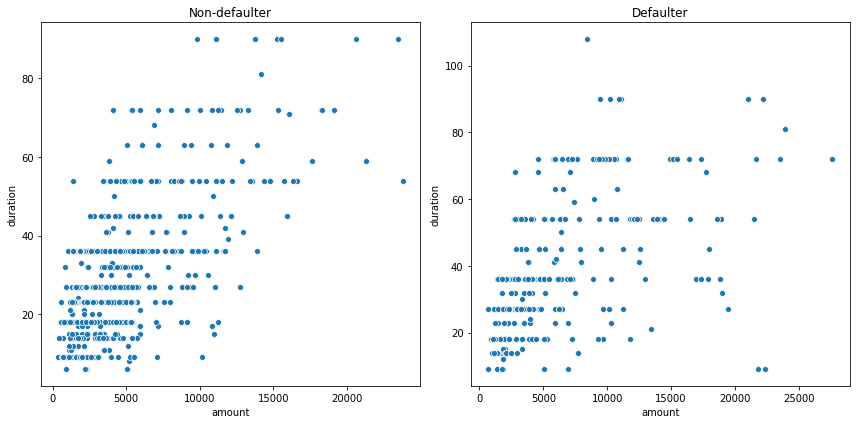

In [338]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(df[df["status"] == 1]['amount'], df[df["status"] == 1]['duration'], ax=ax1)
sns.scatterplot(df[df["status"] == 2]['amount'], df[df["status"] == 2]['duration'], ax=ax2)

plt.tight_layout()
plt.show()

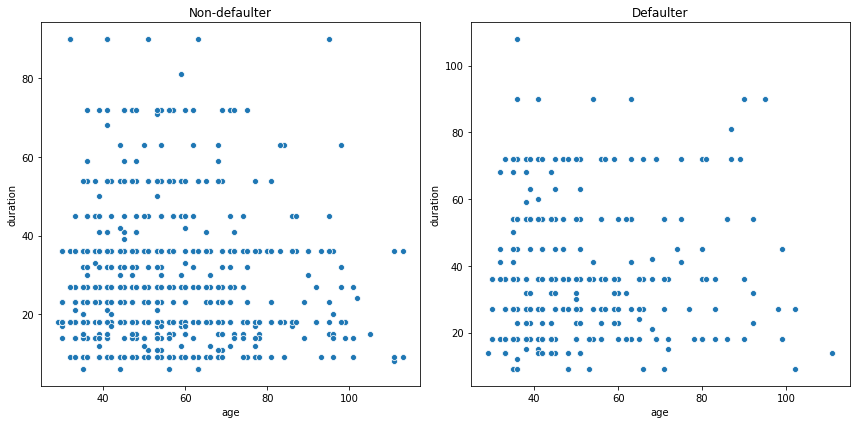

In [339]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(df[df["status"] == 1]['age'], df[df["status"] == 1]['duration'], ax=ax1)
sns.scatterplot(df[df["status"] == 2]['age'], df[df["status"] == 2]['duration'], ax=ax2)

plt.tight_layout()
plt.show()

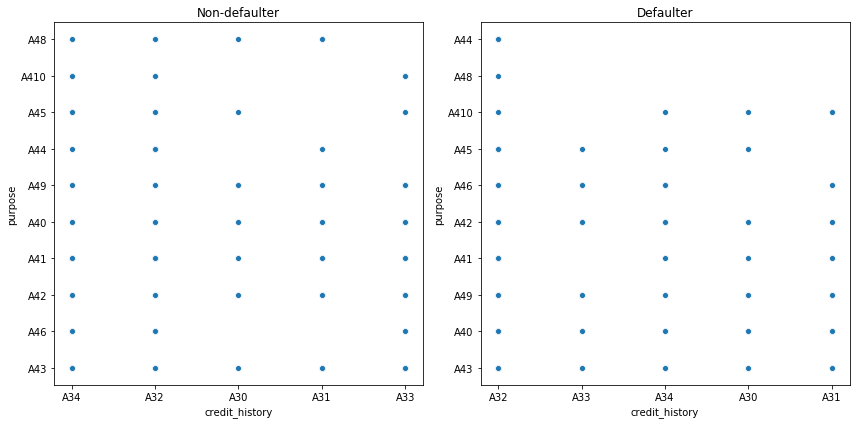

In [340]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(df[df["status"] == 1]['credit_history'], df[df["status"] == 1]['purpose'], ax=ax1)
sns.scatterplot(df[df["status"] == 2]['credit_history'], df[df["status"] == 2]['purpose'], ax=ax2)

plt.tight_layout()
plt.show()

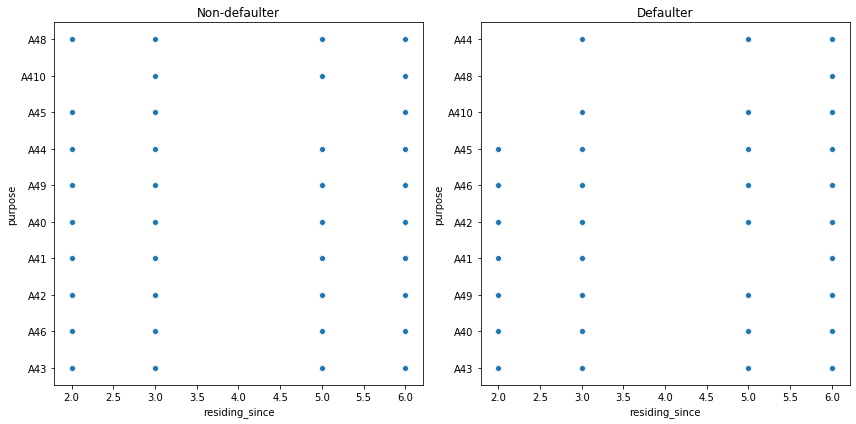

In [341]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(df[df["status"] == 1]['residing_since'], df[df["status"] == 1]['purpose'], ax=ax1)
sns.scatterplot(df[df["status"] == 2]['residing_since'], df[df["status"] == 2]['purpose'], ax=ax2)

plt.tight_layout()
plt.show()

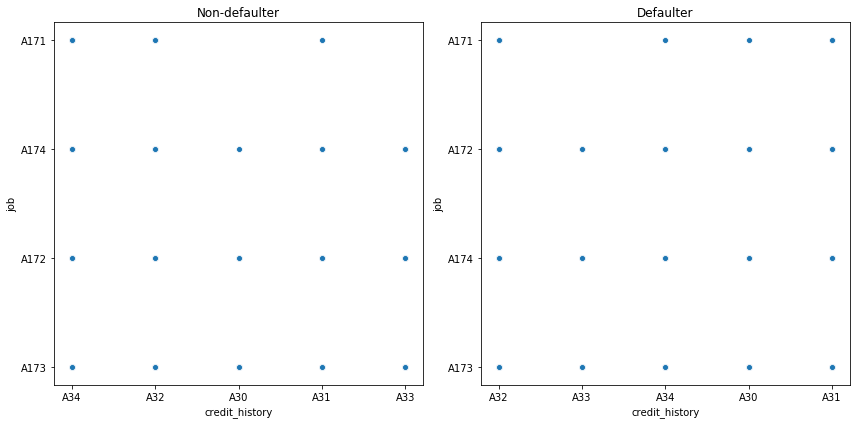

In [342]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(df[df["status"] == 1]['credit_history'], df[df["status"] == 1]['job'], ax=ax1)
sns.scatterplot(df[df["status"] == 2]['credit_history'], df[df["status"] == 2]['job'], ax=ax2)

plt.tight_layout()
plt.show()

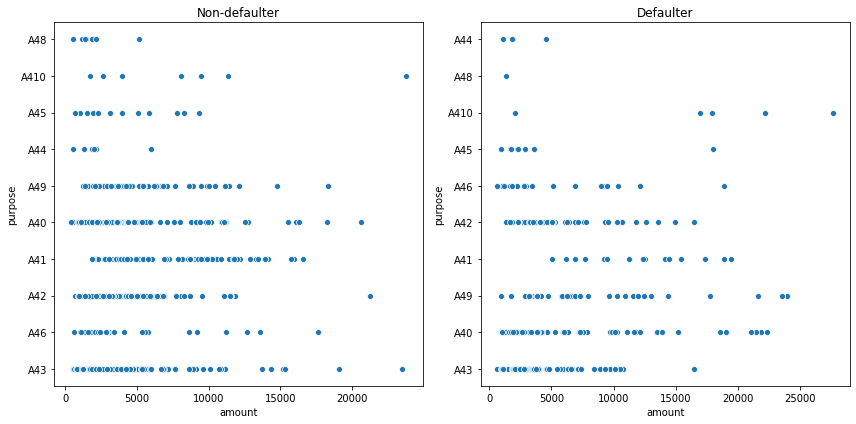

In [343]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(df[df["status"] == 1]['amount'], df[df["status"] == 1]['purpose'], ax=ax1)
sns.scatterplot(df[df["status"] == 2]['amount'], df[df["status"] == 2]['purpose'], ax=ax2)

plt.tight_layout()
plt.show()

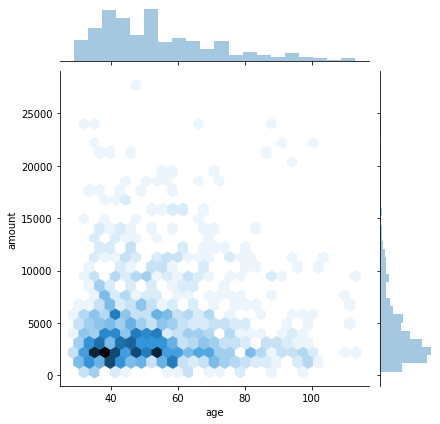

In [344]:
sns.jointplot(x='age',y='amount',data=df,kind='hex')

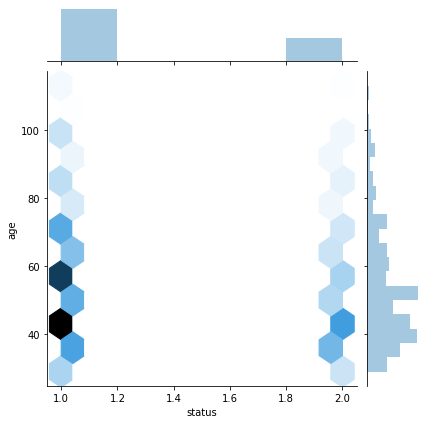

In [345]:
sns.jointplot(x='status',y='age',data=df,kind='hex')

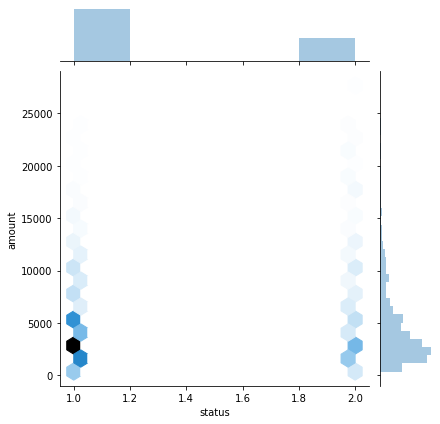

In [346]:
sns.jointplot(x='status',y='amount',data=df,kind='hex')

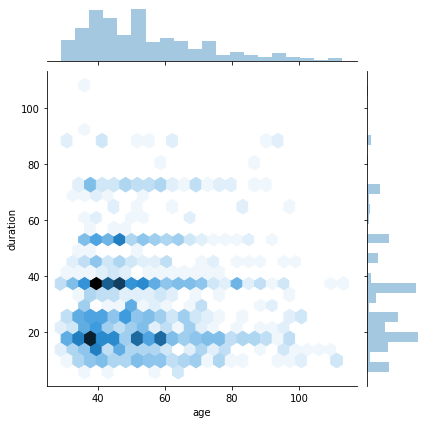

In [347]:
sns.jointplot(x='age',y='duration',data=df,kind='hex')

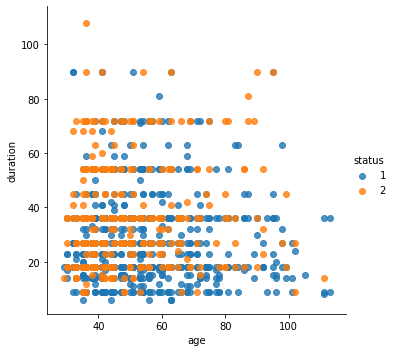

In [348]:
sns.lmplot(x='age', y='duration', hue='status', 
           data=df.loc[df['status'].isin(['1', '2'])], 
           fit_reg=False)

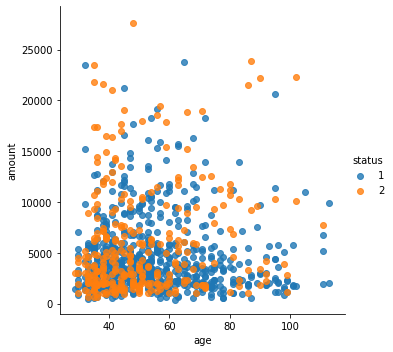

In [349]:
sns.lmplot(x='age', y='amount', hue='status', 
           data=df.loc[df['status'].isin(['1', '2'])], 
           fit_reg=False)

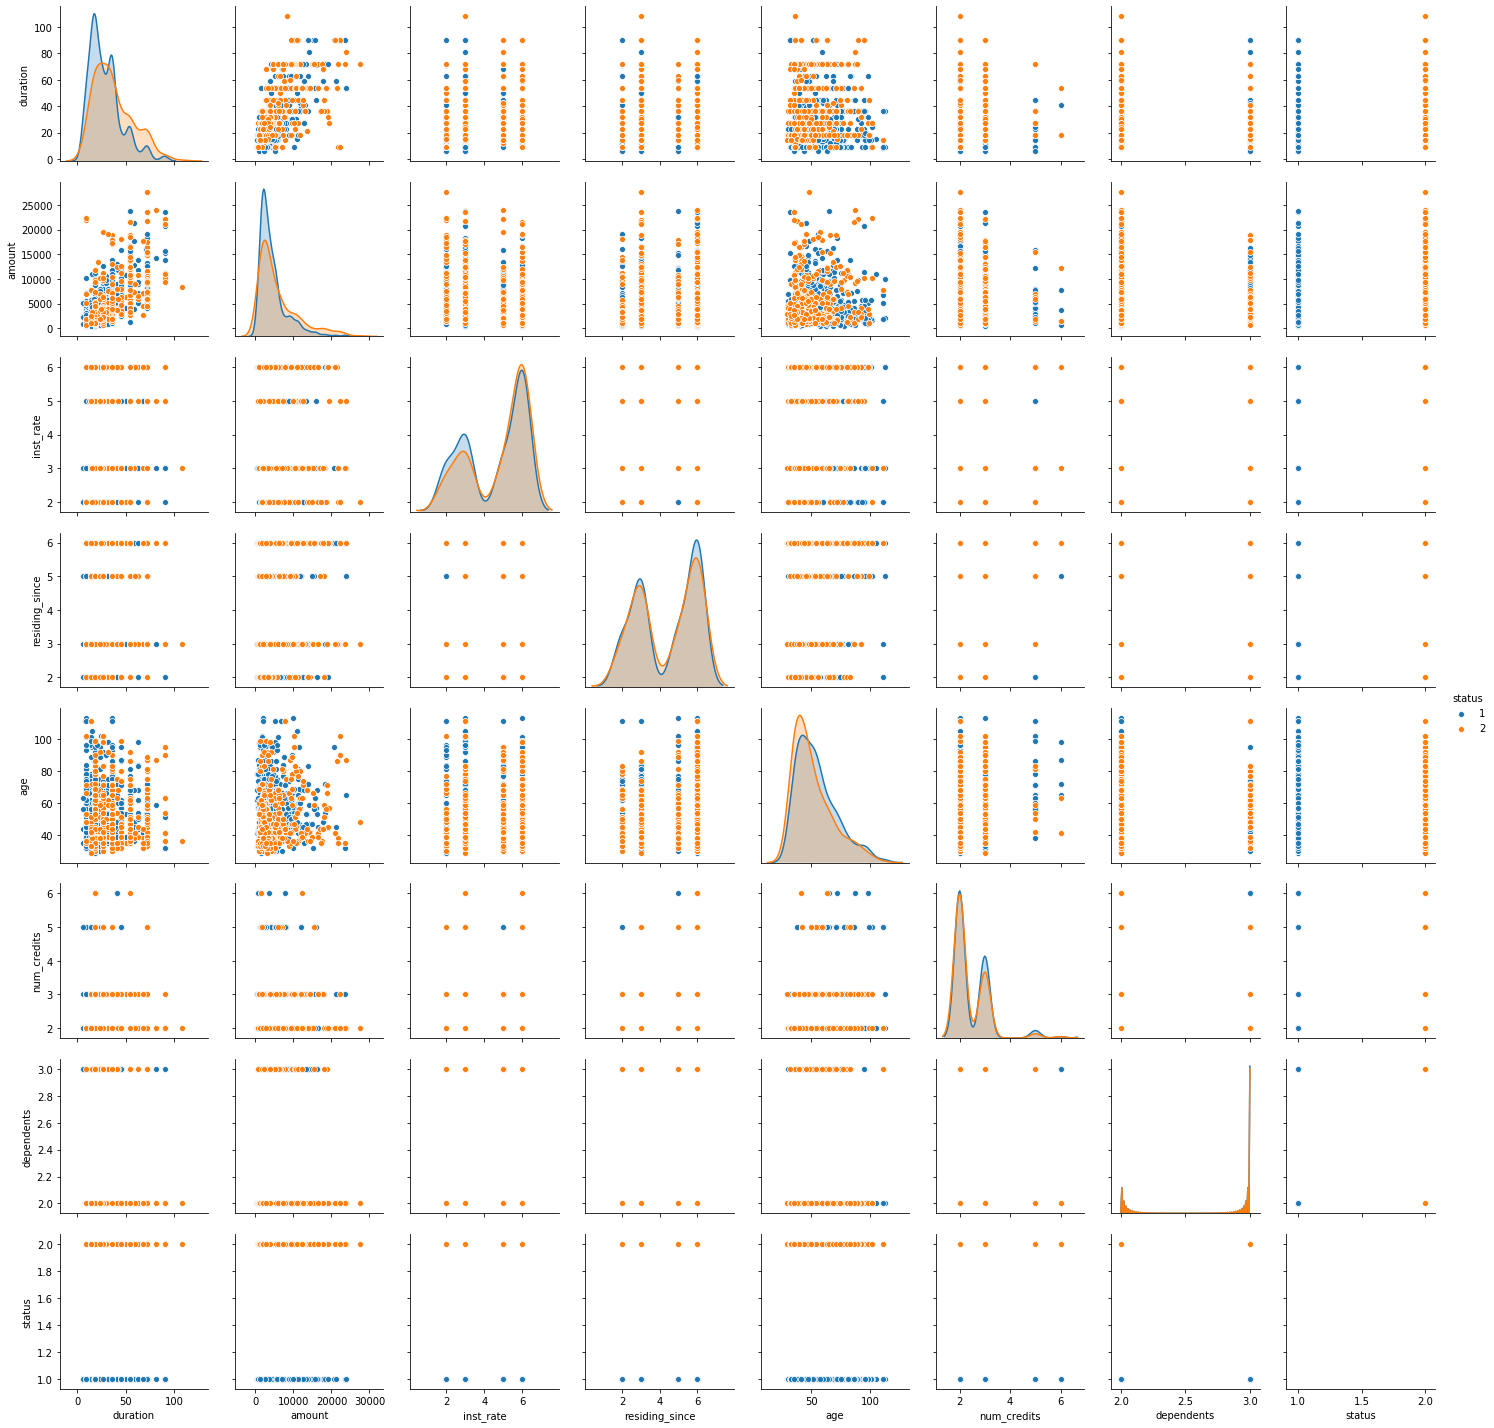

In [350]:
sns.pairplot(df,hue='status')

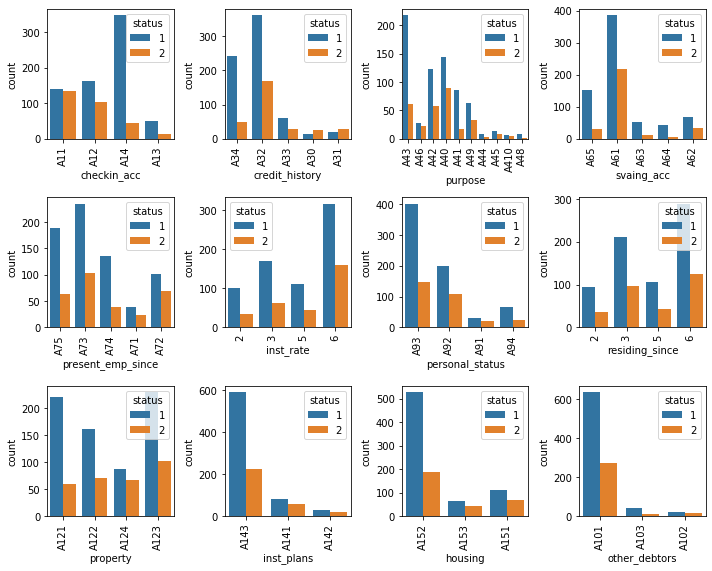

In [351]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['checkin_acc', 'credit_history', 'purpose','svaing_acc','present_emp_since','inst_rate','personal_status','residing_since',
'property','inst_plans','housing','other_debtors']):
    plt.subplot(4, 4, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(df[j], hue=df["status"])
    plt.xticks(rotation=90)
    plt.tight_layout()

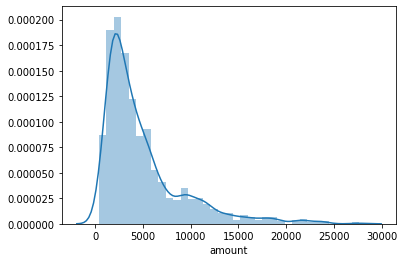

In [352]:

sns.distplot(df["amount"])

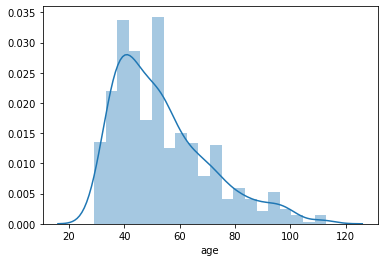

In [353]:
sns.distplot(df["age"])

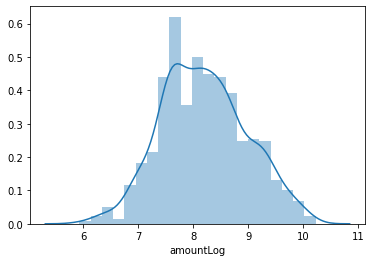

In [354]:
df['amountLog'] = np.log(df['amount']+1)
sns.distplot(df["amountLog"])

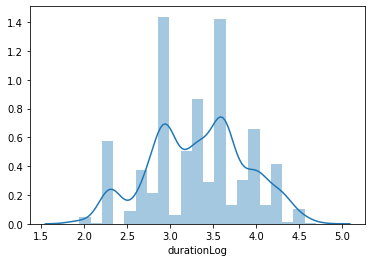

In [355]:
df['durationLog'] = np.log(df['duration']+1)
sns.distplot(df["durationLog"])

In [356]:


df.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,amountLog,durationLog
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A143,A152,3,A173,2,A192,A201,1,7.470224,2.302585
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A143,A152,2,A173,2,A191,A201,2,9.096948,4.290459
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A143,A152,2,A172,3,A191,A201,1,8.053569,2.944439
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A143,A153,2,A173,3,A191,A201,1,9.377887,4.158883
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A143,A153,3,A173,3,A191,A201,2,8.896451,3.610918


In [357]:
# drop unnecessary columns
cols = ['duration','amount']
df = df.drop(columns=cols, axis=1)
df.head()

,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,...,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,amountLog,durationLog
0,A11,A34,A43,A65,A75,6,A93,A101,6,A121,...,A143,A152,3,A173,2,A192,A201,1,7.470224,2.302585
1,A12,A32,A43,A61,A73,3,A92,A101,3,A121,...,A143,A152,2,A173,2,A191,A201,2,9.096948,4.290459
2,A14,A34,A46,A61,A74,3,A93,A101,5,A121,...,A143,A152,2,A172,3,A191,A201,1,8.053569,2.944439
3,A11,A32,A42,A61,A74,3,A93,A103,6,A122,...,A143,A153,2,A173,3,A191,A201,1,9.377887,4.158883
4,A11,A33,A40,A61,A73,5,A93,A101,6,A124,...,A143,A153,3,A173,3,A191,A201,2,8.896451,3.610918


In [372]:
from sklearn.preprocessing import LabelEncoder
cols = ['checkin_acc','credit_history','purpose','svaing_acc','present_emp_since','inst_rate','personal_status','other_debtors','residing_since','property','inst_plans','housing','num_credits','job','dependents','telephone','foreign_worker','status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [373]:
df.head(5)

,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,...,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,amountLog,durationLog
0,0,4,4,4,4,3,2,0,3,0,...,2,1,1,2,0,1,0,0,7.470224,2.302585
1,1,2,4,0,2,1,1,0,1,0,...,2,1,0,2,0,0,0,1,9.096948,4.290459
2,3,4,7,0,3,1,2,0,2,0,...,2,1,0,1,1,0,0,0,8.053569,2.944439
3,0,2,3,0,3,1,2,2,3,1,...,2,2,0,2,1,0,0,0,9.377887,4.158883
4,0,3,0,0,2,2,2,0,3,3,...,2,2,1,2,1,0,0,1,8.896451,3.610918


In [374]:



from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df, test_size=0.25, random_state=42)

In [375]:
df_train.shape,df_test.shape

((750, 21), (250, 21))

In [376]:
target_col = 'status'

#feature space
X_train = df_train.drop(columns=[target_col])
X_test = df_test.drop(columns=[target_col])

#target variable
y_train = df_train[target_col]
y_test = df_test[target_col]

In [377]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue= pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfpvalue,dfscores],axis=1)
featureScores.columns = ['Specs','pvalue','Score']  #naming the dataframe columns
print(featureScores.nlargest(21,'Score'))  #print 10 best features

                Specs        pvalue       Score
0         checkin_acc  1.515088e-22  101.881761
1      credit_history  1.973287e-12   51.220830
19        durationLog  1.569150e-07   28.033082
9            property  2.255808e-05   18.189761
3          svaing_acc  3.984506e-05   17.082155
10                age  2.928277e-04   13.240299
18          amountLog  5.464245e-04   12.054246
4   present_emp_since  7.839728e-04   11.371909
11         inst_plans  9.286487e-03    6.802147
17     foreign_worker  2.098034e-02    5.351035
6     personal_status  2.342686e-02    5.157705
13        num_credits  1.159206e-01    2.477335
14                job  1.369603e-01    2.216539
5           inst_rate  1.737707e-01    1.853639
16          telephone  2.914452e-01    1.114507
7       other_debtors  4.126514e-01    0.671899
2             purpose  6.348676e-01    0.225702
8      residing_since  7.705259e-01    0.085143
12            housing  9.154883e-01    0.011269
15         dependents  9.593586e-01    0

In [378]:
drop_columns=['dependents','housing','residing_since','purpose','inst_plans','present_emp_since']

In [379]:

X_train=X_train.drop(columns=drop_columns)
X_test =X_test.drop(columns=drop_columns)

In [380]:

X_train.shape,X_test.shape

((750, 14), (250, 14))

In [381]:
#ROC dict for TPR and FPR values
roc_dict = {}
#precision recall curve
prc_dict = {}

def modify_roc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for ROC metrics
    """
    
    fpr, tpr, thresholds = roc_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    
    clf_roc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    
    dict_modify[name] = clf_roc_dict
    
def modify_prc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for precision recall metrics
    """
    
    precision, recall, thresholds = precision_recall_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    clf_prc_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    
    dict_modify[name] = clf_prc_dict

In [382]:
def fit_score_clf(clf, X_train, y_train, X_test, y_test, name='clf'):
    """
    fits a classifer from sklearn and returns a dataframe
    clf(sklearn): classifier
    X_train(numpy): train features
    y_train(numpy): predictions row vector
    X_test(numpy): test features
    y_test(numpy): ground truth row vector
    name(string): name of classifier
    
    """
    #fit to train data
    clf.fit(X_train, y_train)
    #make predictions
    y_pred = clf.predict(X_test)
    #make dataframe from report
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    #add clf name as column
    clf_report['clf'] = name
    
    return clf_report

In [383]:
from sklearn.linear_model import LogisticRegression
#instantiate with default params
lr  = LogisticRegression(penalty='l2',
                         C=1.0,
                         solver = 'lbfgs',
                         max_iter=400,
                         n_jobs=-1)

lr_report = fit_score_clf(lr, X_train, y_train, X_test, y_test, name='lr')
lr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
f1-score,0.842667,0.528000,0.764,0.685333,0.752043,lr
precision,0.802030,0.622642,0.764,0.712336,0.750366,lr
recall,0.887640,0.458333,0.764,0.672987,0.764000,lr
support,178.000000,72.000000,0.764,250.000000,250.000000,lr


In [384]:
#metrics for lr
modify_roc_dict(clf=lr,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression', 
                dict_modify=roc_dict)
modify_prc_dict(clf=lr,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression',
                dict_modify=prc_dict)

In [385]:
gbtree = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 100)

gbtree_report = fit_score_clf(gbtree, X_train, y_train, X_test, y_test, name='gbtree')
gbtree_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
f1-score,0.851175,0.512821,0.772,0.681998,0.753729,gbtree
precision,0.795122,0.666667,0.772,0.730894,0.758127,gbtree
recall,0.915730,0.416667,0.772,0.666199,0.772000,gbtree
support,178.000000,72.000000,0.772,250.000000,250.000000,gbtree


In [386]:
#metrics for gbtree
modify_roc_dict(gbtree, y_test, X_test, name='GBTree',dict_modify=roc_dict)

In [387]:
modify_prc_dict(clf=gbtree,
                y_test=y_test,
                X_test=X_test,
                name='GBTree',
                dict_modify=prc_dict)

In [388]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

rf_report = fit_score_clf(rf, X_train, y_train, X_test, y_test, name='rf')
rf_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
f1-score,0.848806,0.536585,0.772,0.692696,0.758887,rf
precision,0.804020,0.647059,0.772,0.725539,0.758815,rf
recall,0.898876,0.458333,0.772,0.678605,0.772000,rf
support,178.000000,72.000000,0.772,250.000000,250.000000,rf


In [389]:
#metrics for random forest
modify_roc_dict(rf, y_test, X_test, name='RandomForest',dict_modify=roc_dict)

In [390]:
modify_prc_dict(clf=rf,
                y_test=y_test,
                X_test=X_test,
                name='RandomForest',
                dict_modify=prc_dict)

In [391]:
xgb_clf = xgb.XGBClassifier(n_estimators=300,
                     subsample=0.9,
                            n_jobs=-1)
xgb_report = fit_score_clf(xgb_clf, X_train, y_train, X_test, y_test, name='xgb')
xgb_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
f1-score,0.866310,0.603175,0.8,0.734742,0.790527,xgb
precision,0.826531,0.703704,0.8,0.765117,0.791156,xgb
recall,0.910112,0.527778,0.8,0.718945,0.800000,xgb
support,178.000000,72.000000,0.8,250.000000,250.000000,xgb


In [392]:
#metrics for xgb
modify_roc_dict(xgb_clf, y_test, X_test, name='XGBoost',dict_modify=roc_dict)

In [393]:
modify_prc_dict(clf=xgb_clf,
                y_test=y_test,
                X_test=X_test,
                name='XGBoost',
                dict_modify=prc_dict)

In [394]:
#put hard limit on iterations to save time in exploration phase
svc = SVC(C=1.0, kernel='rbf',
          gamma='auto', 
          probability=True,
          max_iter=400)

svc_report = fit_score_clf(svc, X_train, y_train, X_test, y_test, name='svc')
svc_report.head()

C:\Users\Shashi kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


,0,1,accuracy,macro avg,weighted avg,clf
f1-score,0.831169,0.434783,0.74,0.632976,0.71701,svc
precision,0.772947,0.581395,0.74,0.677171,0.71778,svc
recall,0.898876,0.347222,0.74,0.623049,0.74000,svc
support,178.000000,72.000000,0.74,250.000000,250.00000,svc


In [395]:
#metrics for svc
modify_roc_dict(svc, y_test, X_test, name='SVC',dict_modify=roc_dict)

In [396]:
modify_prc_dict(clf=svc,
                y_test=y_test,
                X_test=X_test,
                name='SVC',
                dict_modify=prc_dict)

In [397]:
knn = KNeighborsClassifier(n_neighbors =5, n_jobs=-1)

knn_report = fit_score_clf(knn, X_train, y_train, X_test, y_test, name='KNN')
knn_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
f1-score,0.842932,0.491525,0.76,0.667229,0.741727,KNN
precision,0.789216,0.630435,0.76,0.709825,0.743487,KNN
recall,0.904494,0.402778,0.76,0.653636,0.760000,KNN
support,178.000000,72.000000,0.76,250.000000,250.000000,KNN


In [398]:
#metrics for knn
modify_roc_dict(knn, y_test, X_test, name='KNN',dict_modify=roc_dict)

In [399]:
modify_prc_dict(clf=knn,
                y_test=y_test,
                X_test=X_test,
                name='knn',
                dict_modify=prc_dict)

In [400]:
#see keys we have
roc_dict.keys()

dict_keys(['Logistic Regression', 'GBTree', 'RandomForest', 'XGBoost', 'SVC', 'KNN'])

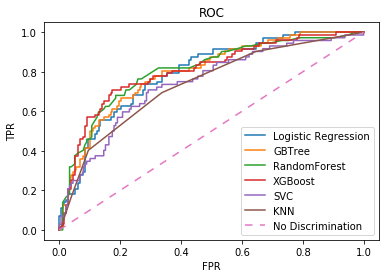

In [401]:
import os
for key in roc_dict:
    clf = roc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(5, 5))
plt.savefig(os.path.join('roc_curve_all_models.png'))
plt.legend()
plt.show()

In [402]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
xgb_clf = xgb.XGBClassifier(n_estimators=300,
                            subsample=0.9,
                           n_jobs=-1,
                           scale_pos_weight=estimate)

xgb_clf.fit(X_train, y_train)

Estimate: 2.289


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.289473684210526,
              seed=None, silent=None, subsample=0.9, verbosity=1)

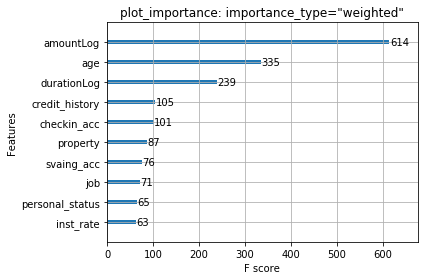

In [403]:
#”weight” is the number of times a feature appears in a tree
xgb.plot_importance(xgb_clf, 
                    importance_type='weight',
                    max_num_features=10, 
                    title='plot_importance: importance_type="weighted"')
plt.tight_layout()
plt.show()

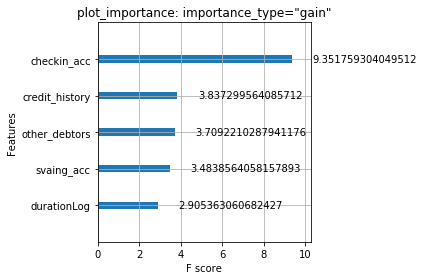

In [404]:
#”gain” is the average gain of splits which use the feature

xgb.plot_importance(xgb_clf, 
                    importance_type='gain',
                    max_num_features=5, 
                    title='plot_importance: importance_type="gain"')
plt.tight_layout()
plt.show()

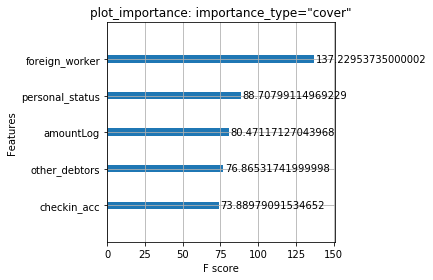

In [405]:
#is the average coverage of splits which use the feature 
#where coverage is defined as the number of samples affected by the split

xgb.plot_importance(xgb_clf, 
                    importance_type='cover',
                    max_num_features=5, 
                    title='plot_importance: importance_type="cover"')
plt.tight_layout()
plt.show()

In [406]:
y_pred=xgb_clf.predict(X_test)
y_prob=xgb_clf.predict_proba(X_test)

In [407]:
y_prob=y_prob[:, 1] #keeping only positive outcomes

In [408]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

[[151  27]
 [ 24  48]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       178
           1       0.64      0.67      0.65        72

    accuracy                           0.80       250
   macro avg       0.75      0.76      0.75       250
weighted avg       0.80      0.80      0.80       250



In [409]:
# calculate AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC: %.3f' % auc)

AUC: 0.808


In [411]:
from pandas import ExcelWriter

writer = ExcelWriter('PythonExport.xlsx')
df.to_excel(writer,'submission')
writer.save()